In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm

In [142]:
df = pd.read_csv('Employee_Performance-1.csv', na_values='NaN')



In [143]:
#Cleaning Dataset
numerical_columns = df.select_dtypes(include=[np.number]).columns
z_scores = zscore(df[numerical_columns])
outliers = (np.abs(z_scores)>3).any(axis=1)
print(df[outliers])
print (f"There are {outliers.sum()} outliers in this database")

#Creating copy of df without outliers
df = df[~outliers].copy()

#Handling missing values
print(df.isnull().sum())

#One-hot encoding for categorical values



      EmployeeID Department  Gender  Experience  TrainingHours  \
1082        2083         IT  Female           9             35   
1189        2190         IT    Male           9             25   
1306        2307      Sales    Male           9             35   
1338        2339      Sales  Female           9             48   
1404        2405      Sales    Male           9             48   
1421        2422  Marketing  Female           9             48   
1460        2461         IT    Male           9             10   

      PerformanceRating  Salary  
1082               5.12   53010  
1189               5.12   53010  
1306               5.12   53010  
1338               5.19   53010  
1404               5.48   53020  
1421               5.50   53100  
1460               5.50   53100  
There are 7 outliers in this database
EmployeeID           0
Department           0
Gender               0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               0


In [144]:
#Part 1 Task 1
print(f"Head\n {df.head} ")
print(f"Shape of the dataset: {df.shape}")
#Summary Stats
summary_stats = df.describe()
print((summary_stats))

Head
 <bound method NDFrame.head of       EmployeeID Department  Gender  Experience  TrainingHours  \
0           1001         IT    Male           4              5   
1           1002  Marketing  Female           0             50   
2           1003      Sales    Male           0              5   
3           1004         HR    Male           1              5   
4           1005         HR  Female           9              5   
...          ...        ...     ...         ...            ...   
1463        2464         IT  Female           1              5   
1464        2465  Marketing  Female           1              5   
1465        2466         IT  Female           1              5   
1466        2467         IT    Male           0              5   
1467        2468         IT    Male           0              5   

      PerformanceRating  Salary  
0                  1.00   19000  
1                  5.50    6900  
2                  1.00    6000  
3                  1.00    6000  
4

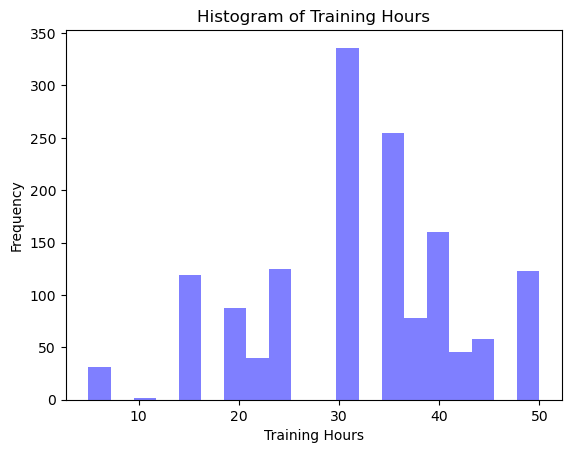

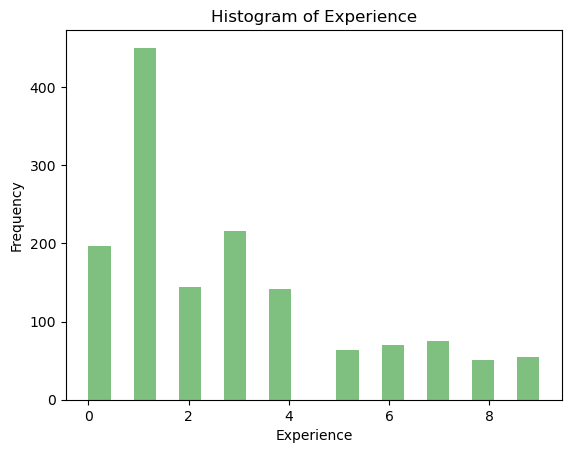

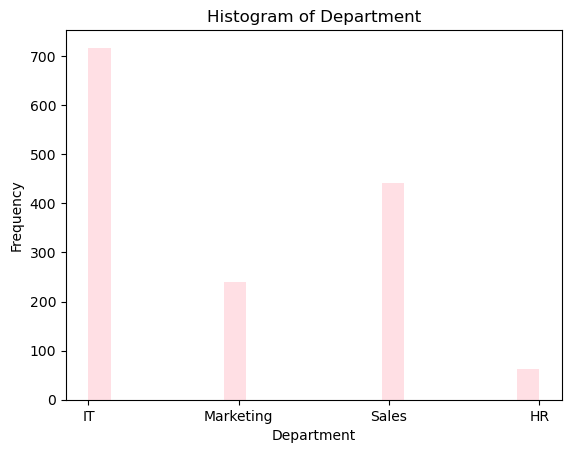

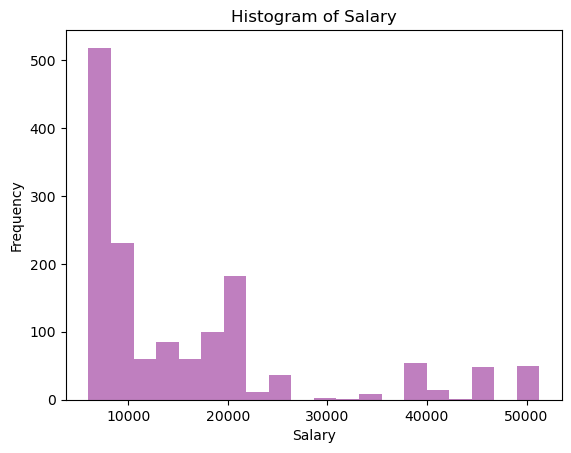

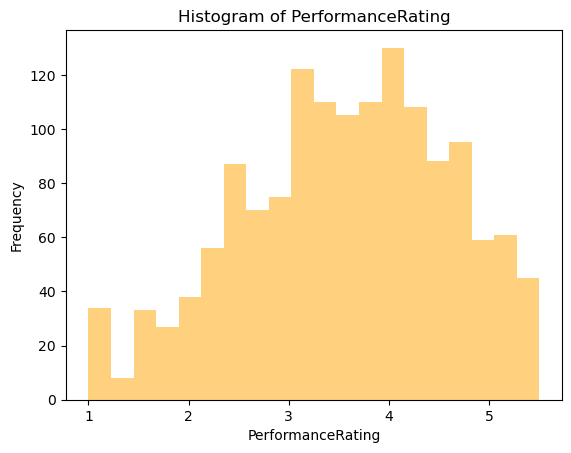

In [145]:
#Data distribution visualisation.

# Histogram of TrainingHours
plt.hist(df['TrainingHours'], bins=20, color='blue', alpha=0.5, label='TrainingHours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Training Hours')
plt.show()

# Histogram of Experience
plt.hist(df['Experience'], bins=20, color='green', alpha=0.5, label='Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Experience')
plt.show()

# Histogram of Department
plt.hist(df['Department'], bins=20, color='pink', alpha=0.5, label='Department')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Histogram of Department')
plt.show()


# Histogram of Salary
plt.hist(df['Salary'], bins=20, color='purple', alpha=0.5, label='Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary')
plt.show()

# Histogram of Performance Rating
plt.hist(df['PerformanceRating'], bins=20, color='orange', alpha=0.5, label='PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Frequency')
plt.title('Histogram of PerformanceRating')
plt.show()


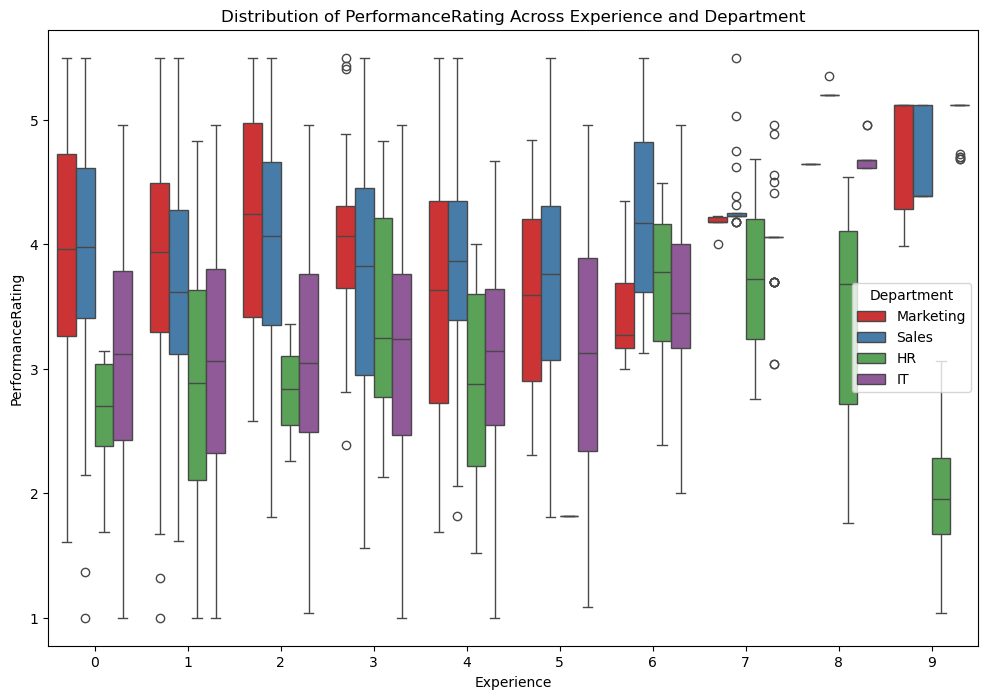

In [146]:
#employee experience and performance ratings in different departments
cat_var1 = 'Experience'
cat_var2 = 'Department'

plt.figure(figsize=(12, 8))
sns.boxplot(x=cat_var1, y='PerformanceRating', hue=cat_var2, data=df, palette='Set1')

plt.xlabel(cat_var1.capitalize())
plt.ylabel('PerformanceRating')
plt.title(f'Distribution of PerformanceRating Across {cat_var1.capitalize()} and {cat_var2.capitalize()}')
plt.legend(title=cat_var2.capitalize())
plt.show()




In [147]:
#Task 2 
# Begin by defining your analysis's objective.
# Identify any assumptions you've made before conducting the analysis.
# Formulate your null and alternative hypotheses based on the objective of your analysis.



print("Objective -  The objective of this analysis is to gain insight for future decision making by analysing potential variations in the employee")
print("performance rating across departments. If such variations exist the goal is to identify which department exhibit notably higher or lower ratings.")
print("Assumption - Different departments within the organization may have varying employee performance ratings due to differences in departmental cultures, management styles, work environments, or expectations.")
print("Null hypothesis - There is no significant difference in employee performance ratings across the different departments in the organization. (i.e., the mean performance ratings for all departments are equal)")
print("Alternative hypothesis - here is a significant difference in employee performance ratings across the different departments. (i.e., at least one department has a mean performance rating that is significantly different from the others).")


Objective -  The objective of this analysis is to gain insight for future decision making by analysing potential variations in the employee
performance rating across departments. If such variations exist the goal is to identify which department exhibit notably higher or lower ratings.
Assumption - Different departments within the organization may have varying employee performance ratings due to differences in departmental cultures, management styles, work environments, or expectations.
Null hypothesis - There is no significant difference in employee performance ratings across the different departments in the organization. (i.e., the mean performance ratings for all departments are equal)
Alternative hypothesis - here is a significant difference in employee performance ratings across the different departments. (i.e., at least one department has a mean performance rating that is significantly different from the others).


In [148]:
print(" one-way ANOVA to compare the mean employee performance ratings across the departments. If the ANOVA result is significant, indicating that there are differences in performance ratings, you can follow up with a Tukey's HSD post-hoc test to identify which specific departments have significantly higher or lower ratings.")

 one-way ANOVA to compare the mean employee performance ratings across the departments. If the ANOVA result is significant, indicating that there are differences in performance ratings, you can follow up with a Tukey's HSD post-hoc test to identify which specific departments have significantly higher or lower ratings.


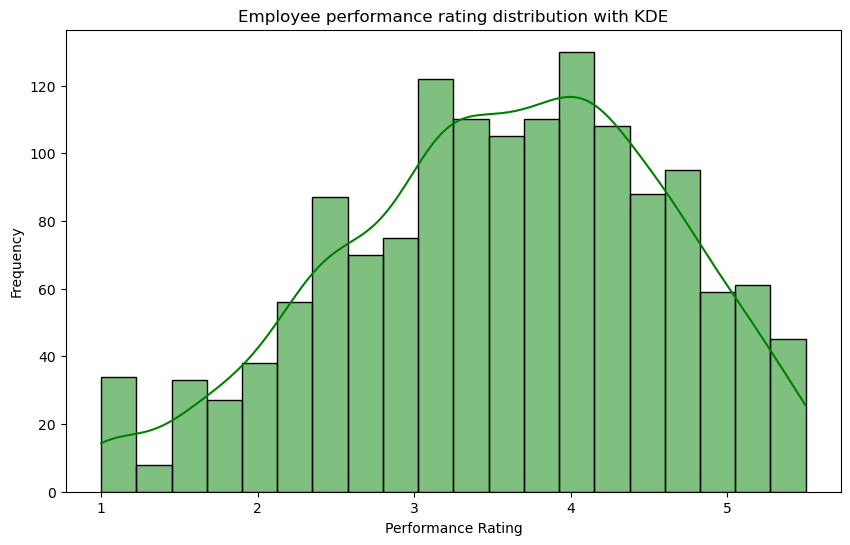

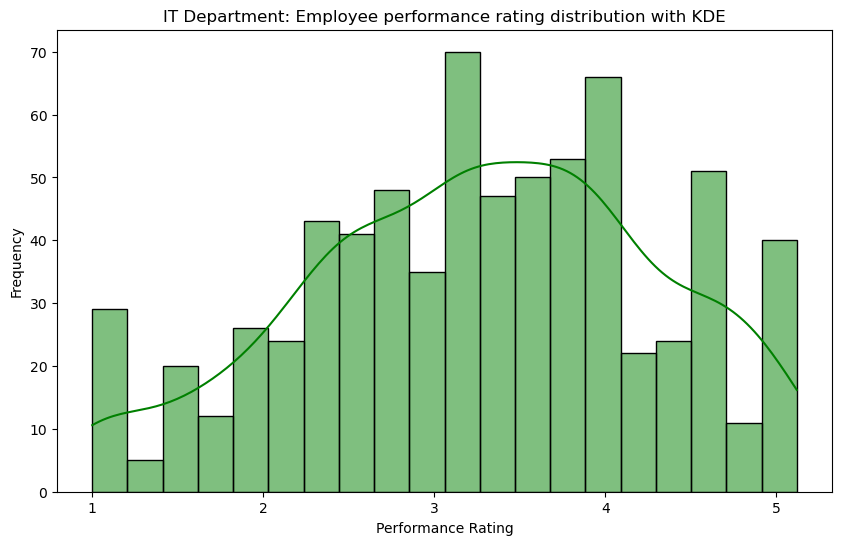

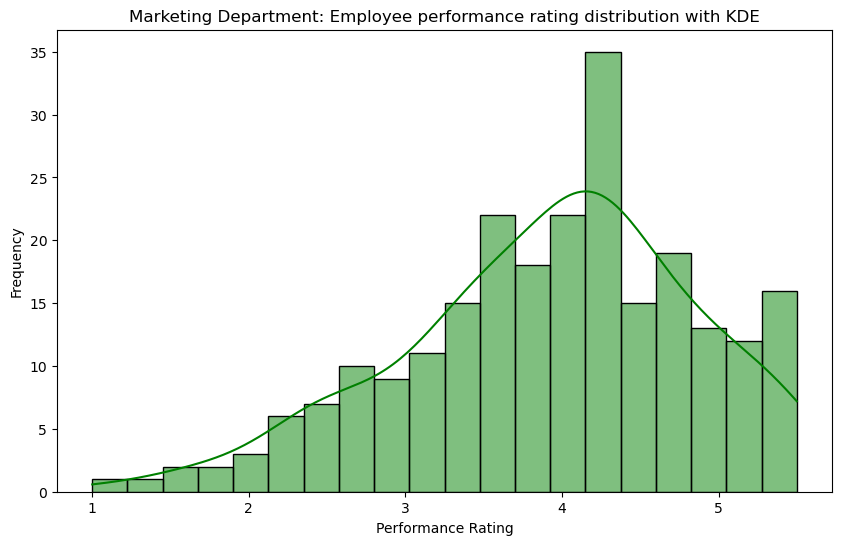

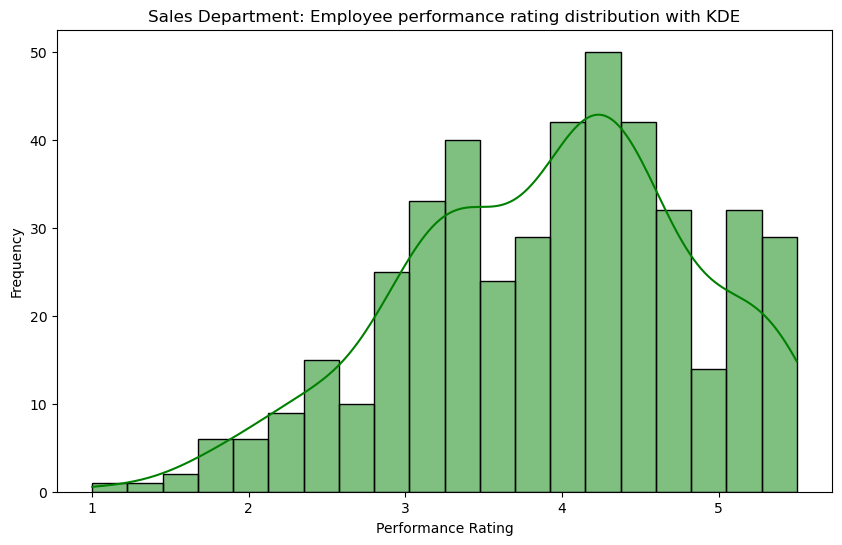

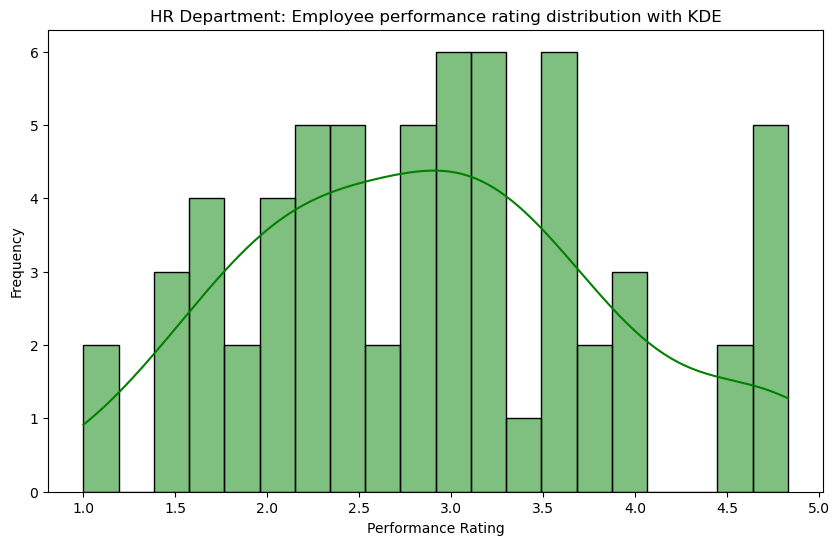

In [149]:
#Task 3
plt.figure(figsize=(10,6))
sns.histplot(df['PerformanceRating'],kde=True, bins=20, color='green')
plt.title('Employee performance rating distribution with KDE')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

departments = df['Department'].unique()
#Loop over departments to create individual plots
for dept in departments:
    plt.figure(figsize=(10,6))
    sns.histplot(df[df['Department'] == dept], x='PerformanceRating', kde=True, bins=20, color='green')
    plt.title(f'{dept} Department: Employee performance rating distribution with KDE')
    plt.xlabel('Performance Rating')
    plt.ylabel('Frequency')
    plt.show()

In [150]:

#(F-statistic, p-value, critical value) in your results.
#Step 1.4
departments = df['Department'].unique()
# Perform one-way ANOVA on the test scores of the three streams
grouped_data = [df[df['Department'] == dept]['PerformanceRating'] for dept in departments]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Create an empty dictionary to store stream counts
departments = {}

# Loop through unique stream values
for dept in df['Department'].unique():
    # Count the occurrences of the current stream and store it in the dictionary
    count = len(df[df['Department'] == dept])
    departments[dept] = count

# Print the stream counts
for dept, count in departments.items():
    print(f"Stream {dept}: {count} observations")
    
    
print("One-way ANOVA Results")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")


#Step 1.6
# Interpret the results using the information provided on page 2 of the lab task as a general guide.
alpha = 0.05
if p_value < alpha:
    print("Write your interpretation here")
else:
    print("Write your interpretation here")


#Critical value 

# Degrees of freedom
df_between = len(departments) - 1
df_within = len(df) - len(departments)

# Calculate the critical F-value based on alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the results
print(f"Critical F-value: {critical_f_value:.2f}")


Stream IT: 717 observations
Stream Marketing: 239 observations
Stream Sales: 442 observations
Stream HR: 63 observations
One-way ANOVA Results
F-statistic: 61.53
P-value: 0.0000
Write your interpretation here
Critical F-value: 2.61


In [151]:
#If found significant differences across Departments ( Turky's post hoc test )
# Perform Tukey's HSD post hoc test
multicomp = MultiComparison(df['PerformanceRating'], df['Department'])
result = multicomp.tukeyhsd()

# Display the results
print("\nTukey's HSD Post Hoc Test:")
print(result)


Tukey's HSD Post Hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3633 0.0253  0.0316 0.6949   True
       HR Marketing   1.0204    0.0   0.663 1.3779   True
       HR     Sales   1.0166    0.0  0.6767 1.3564   True
       IT Marketing   0.6572    0.0  0.4687 0.8457   True
       IT     Sales   0.6533    0.0  0.5007 0.8059   True
Marketing     Sales  -0.0039    1.0 -0.2065 0.1988  False
---------------------------------------------------------


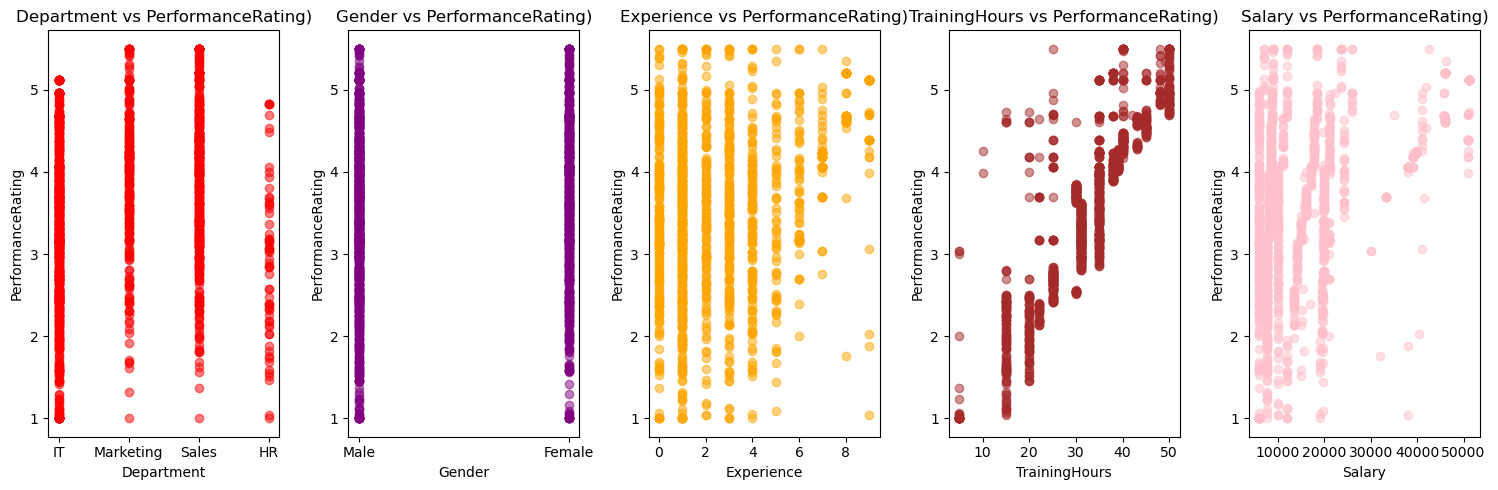

In [155]:
'''
#Part 2 regression analysis 
Task 3 - Perform multiple linear regression analysis
 using the identified predictor variables. Include the model output with all relevant parameters.


'''


 
X = df[[ 'Department', 'Gender', 'Experience', 'TrainingHours', 'Salary',]]
y = df['PerformanceRating']

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

colors = ['red', 'purple', 'orange', 'brown', 'pink']
for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5, color = colors[i % len(colors)])
    axes[i].set_title(f'{col} vs PerformanceRating)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('PerformanceRating')

plt.tight_layout()
plt.show()

X = sm.add_constant(X)


In [175]:
'''
OLS Regression Model
'''

X = df[['Experience', 'TrainingHours', 'Salary', 'Department_IT', 'Department_Marketing', 'Department_Sales', 'Gender_Male']]
y = df['PerformanceRating']


X = X.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to integers
X['Department_IT'] = X['Department_IT'].astype(int)
X['Department_Marketing'] = X['Department_Marketing'].astype(int)
X['Department_Sales'] = X['Department_Sales'].astype(int)
X['Gender_Male'] = X['Gender_Male'].astype(int)

X = sm.add_constant(X)  

X = X.dropna()
y = y[X.index] 

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()  

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1208.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:26:36   Log-Likelihood:                -728.27
No. Observations:                1461   AIC:                             1473.
Df Residuals:                    1453   BIC:                             1515.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2934 